In [18]:
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import skew

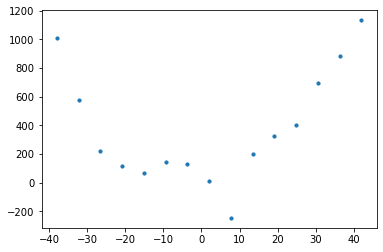

In [219]:
#plt.rcParams["figure.figsize"] = (5,5)
#np.random.seed(0)
x = 2 - np.linspace(-10,10,num=15) *4    #np.linspace(-10,10,num=10)  
y = x + 0.6 * (x ** 2) +2+ 10*np.random.normal(0, 16, size=x.size)   #+ 4.5 * (x ** 3)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

In [224]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

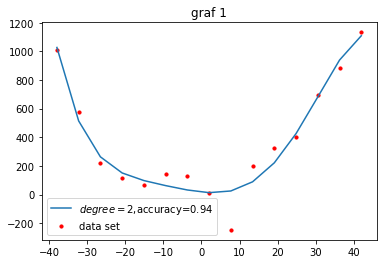

In [225]:
model = LinearRegression().fit(x_poly,y)
y_pred = model.predict(x_poly)
plt.plot(x, y_pred,label="$degree = {}$,accuracy={:.2f}".format(2,model.score(x_poly,y)))  #L = 0.0028
plt.scatter(x,y, s=10,color='r',label="data set")
plt.title('graf 1')
plt.legend()

range(0, 18)

In [226]:
weights = []
labels = []
for i in range(len(model.coef_[0,:])):
    print(i)
    weights.append(((model.coef_[0,i])))
    labels.append(r'$\theta_{}$'.format(i))
    

0
1
2
3
4
5


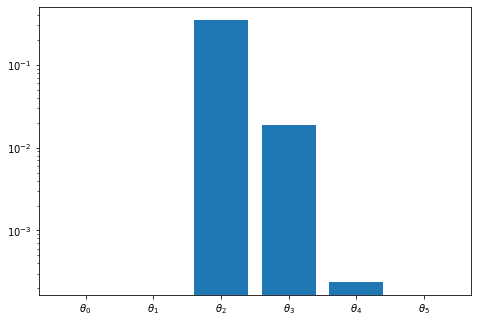

In [227]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,weights,log=True)
ax.set_yscale("log")
plt.show()

In [214]:
StandardScaler().fit_transform(model.coef_)
model.coef_

array([[ 0.00000000e+00, -7.28064121e+00,  8.25825067e-01,
         1.82051492e-02, -1.41393300e-04, -6.83396244e-06]])

In [229]:
coef_df = pd.DataFrame({'weights': model.coef_[0,:],
                        'varname': labels
                       })

In [232]:
coef_df.plot(x='varname', y='weights', kind='bar', 
             ax=ax, legend=False)
plt.show()